<a href="https://colab.research.google.com/github/arizonaCameraLab/computationalImaging/blob/master/Chapter2ForwardModels/FourierRepresentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Optical Imaging
### David J. Brady
### University of Arizona

## Fourier Representation of a Signal with Compact Support

This notebook supports ideas developed in section 2.2 of *Computational Optical Imaging*. Specifically we consider the use of Fourier series to represent the signal $f(x)$ on the interval $\left [ -{L\over 2},{L\over 2}\right ]$.

#### initialization code

In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display, clear_output
import ipywidgets as widgets
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.integrate as integrate
%matplotlib inline

## Series representation of $f(x)$

Here we use a polynomial fit to  specify a function on the range $\left [ -{1\over 2},{1\over 2}\right ]$. Use the sliders to set values of $(x,y)$, the plots update each time an new $y$ value is added. Change the number of Fourier series terms used to to see how the series converges. The array of $\cos$ and $\sin$ coefficients is also shown.

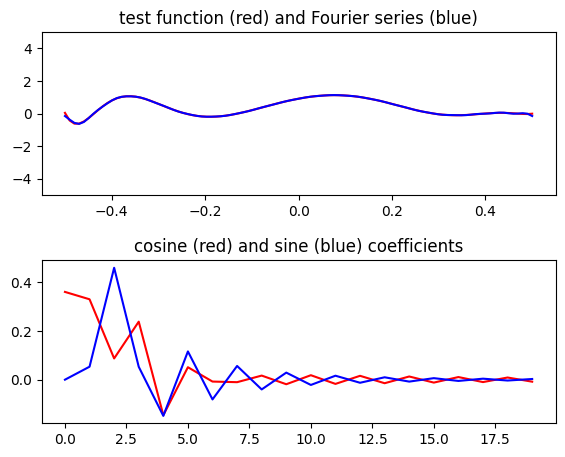

'Adjust curve, enter number of Fourier Coefficients.'

FloatSlider(value=0.15, continuous_update=False, description='x value', max=0.5, min=-0.5, step=0.05)

FloatSlider(value=2.75, continuous_update=False, description='y value', max=5.0, min=-5.0, orientation='vertic…

BoundedIntText(value=20, description='Coefficients:', min=1)

In [4]:
points=np.zeros(21)
xvals=np.linspace(-.5,.5,21)

fig = plt.figure()
plt.plot(xvals,points,'r')

def on_value_change(change):
        points[np.int8(20*(x.value+0.5))]=y.value;
        z = np.polyfit(xvals, points, 10)
        p = np.poly1d(z)
        sv=np.zeros(nfc.value)
        cv=np.zeros(nfc.value)
        for pop in np.arange(nfc.value):
          sv[pop]=2*integrate.quad(lambda x: p(x)*np.sin(2*np.pi*pop*x), -.5, .5)[0]
          cv[pop]=2*integrate.quad(lambda x: p(x)*np.cos(2*np.pi*pop*x), -.5, .5)[0]
        cv[0]=cv[0]/2
        def px(x,sv,cv):
          pxx=0;
          for pop in np.arange(len(sv)):
            pxx=pxx+sv[pop]*np.sin(2*np.pi*pop*x)+cv[pop]*np.cos(2*np.pi*pop*x)
          return pxx
        clear_output(wait=True)
        plt.subplot(2, 1, 1)
        plt.tight_layout(pad=3)
        plt.plot(np.linspace(-.5,.5,100),p(np.linspace(-.5,.5,100)),'r',np.linspace(-.5,.5,100),px(np.linspace(-.5,.5,100),sv,cv),'b')
        plt.ylim(-5, 5)
        plt.title('test function (red) and Fourier series (blue)')
        plt.subplot(2, 1, 2)
        plt.plot(np.arange(nfc.value),cv,'r',np.arange(nfc.value),sv,'b')
        plt.title('cosine (red) and sine (blue) coefficients')
        plt.show()
        display('Adjust curve, enter number of Fourier Coefficients.', x,y, nfc)
        y.observe(on_value_change, names='value')
        return
x=widgets.FloatSlider(
    value=0,
    min=-.5,
    max=.5,
    step=0.05,
    description='x value',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
)
y=widgets.FloatSlider(
    value=0,
    min=-5.,
    max=5.,
    step=0.05,
    description='y value',
    disabled=False,
    continuous_update=False,
    orientation='vertical',
    readout=True,
)
nfc=widgets.BoundedIntText(
    value=5,
    min=1,
    max=100,
    step=1,
    description='Coefficients:',
    disabled=False
)
display('Adjust curve.', x,y)
y.observe(on_value_change, names='value')


## Example of $f(x)$

As a particular example, consider
$$
f(x)=\left \lbrace {
    \begin{aligned}
        0 &\text{ for } -.5<x \leq -.25\\
        4*(x+.25)&\text{ for }  -.25<x \leq 0\\
        1 &\text{ for } 0<x\leq .25\\
        0 &\text{ for } .25<x
    \end{aligned}}\right.
    $$

In [5]:
def f(x):
  if x<-.25:
    f=0.
  elif x<0:
    f=4.*(x+.25)
  elif x<.25:
    f=1.
  else:
    f=0.
  return f


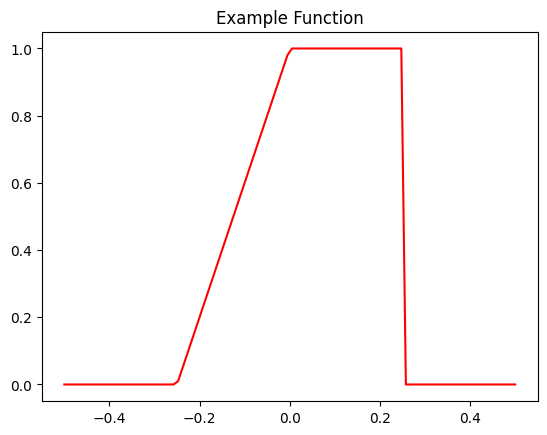

In [6]:
from numpy import vectorize
vf = vectorize(f)
plt.plot(np.linspace(-.5,.5,100),vf(np.linspace(-.5,.5,100)),'r')
plt.title("Example Function")
plt.savefig('exampleFS.png')

<ipython-input-7-e425208c7d9d>:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, pt)


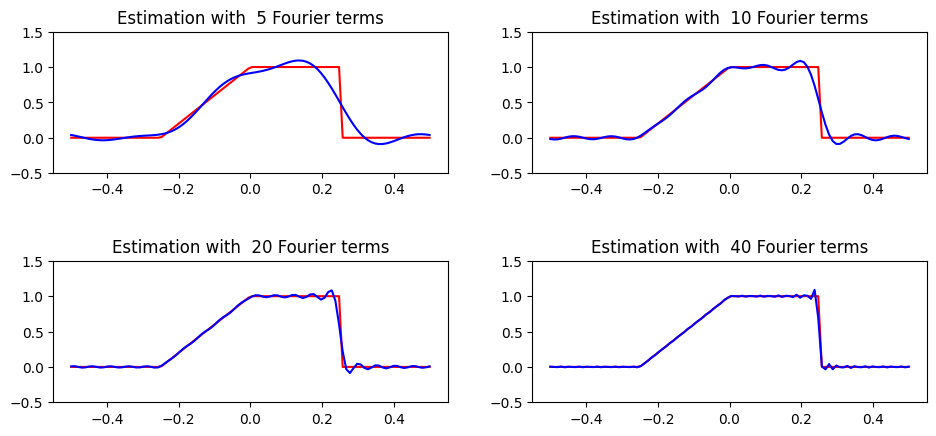

In [7]:
pt=0;
plt.subplots(figsize=(10,5))
xrange=np.linspace(-.5,.5,100);
for coeffs in [5, 10, 20, 40]:
  pt=pt+1
  sv=np.zeros(coeffs)
  cv=np.zeros(coeffs)
  for pop in np.arange(coeffs):
    sv[pop]=2*integrate.quad(lambda x: vf(x)*np.sin(2*np.pi*pop*x), -.5, .5)[0]
    cv[pop]=2*integrate.quad(lambda x: vf(x)*np.cos(2*np.pi*pop*x), -.5, .5)[0]
    cv[0]=cv[0]
    def px(x,sv,cv):
      pxx=0;
      for pop in np.arange(len(sv)):
        pxx=pxx+sv[pop]*np.sin(2*np.pi*pop*x)+cv[pop]*np.cos(2*np.pi*pop*x)
      return pxx
  plt.subplot(2, 2, pt)
  plt.plot(xrange,vf(xrange),'r',xrange,px(xrange,sv,cv)-cv[0]/2.,'b')
  plt.ylim(-.5, 1.5)
  plt.title("Estimation with  %i Fourier terms" %(pop+1))
  plt.tight_layout(pad=3)
  plt.savefig('exampleFSexpansion.png')

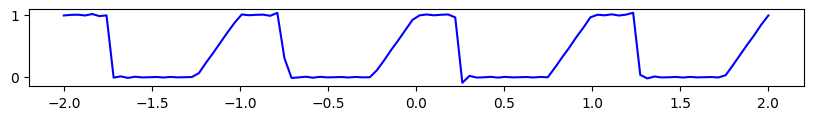

In [12]:
  plt.figure(figsize=(10,1))
  plt.plot(4*xrange,px(4*xrange,sv,cv)-cv[0]/2.,'b')